## CS 301 - Project 1 - Arnav Kucheriya

### NYC Wi-Fi Hotspot Regression Project

In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# Initializing linear regression model
from sklearn.linear_model import LinearRegression

# Evaluating model performance
from sklearn.metrics import r2_score, mean_squared_error

NYC Wi-Fi Hotspot Locations

Updated: September 23, 2022

Update Frequency: As needed

Automation:	No

Date Made Public: 7/14/2015

Data Provided By
Office of Technology and Innovation (OTI) and New York City Government

https://data.cityofnewyork.us/City-Government/NYC-Wi-Fi-Hotspot-Locations/yjub-udmw/about_data

The dataset includes features such as Borough, Wi-Fi Provider, Type (Free/Limited), and geographic coordinates (Latitude, Longitude). These attributes will help analyze hotspot distribution across NYC.

In [31]:
# Reading dataset into a DataFrame
wifi_df = pd.read_csv("NYC_Wifi_Data_Dictionary.csv")
wifi_df.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.892077,...,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.217755,...,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.908840,...,East Williamsburg,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)"
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.680416,...,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)"
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.888161,...,Upper East Side-Carnegie Hill,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)"


## Preprocessing & Feature Engineering

In [32]:
# Display basic information about dataset
wifi_df.info()

# Check for missing values
wifi_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   OBJECTID                                     3319 non-null   int64  
 1   Borough                                      3319 non-null   int64  
 2   Type                                         3319 non-null   object 
 3   Provider                                     3319 non-null   object 
 4   Name                                         3089 non-null   object 
 5   Location                                     3319 non-null   object 
 6   Latitude                                     3319 non-null   float64
 7   Longitude                                    3319 non-null   float64
 8   X                                            3319 non-null   float64
 9   Y                                            3319 non-null   float64
 10  

OBJECTID                                          0
Borough                                           0
Type                                              0
Provider                                          0
Name                                            230
Location                                          0
Latitude                                          0
Longitude                                         0
X                                                 0
Y                                                 0
Location_T                                        0
Remarks                                         548
City                                              0
SSID                                              0
SourceID                                       1062
Activated                                         0
BoroCode                                          0
Borough Name                                      0
Neighborhood Tabulation Area Code (NTACODE)       0
Neighborhood

In [33]:
columns_to_drop = [
    'OBJECTID', 'Location (Lat, Long)', 'BIN', 'BBL', 'DOITT_ID', 'Activated',
    'BCTCB2010', 'BoroCD', 'BoroCode', 'Census Tract'
]

# Dropping irrelevant or redundant columns
wifi_cleaned = wifi_df.drop(columns=columns_to_drop)
wifi_cleaned.rename(columns={'Borough Name': 'Borough', 'Type': 'WiFi_Type'}, inplace=True)

# Dropping rows with missing key categorical values
wifi_cleaned = wifi_cleaned.dropna(subset=['WiFi_Type', 'Provider', 'Location'])

categorical_cols = ['Borough', 'City', 'WiFi_Type', 'Provider', 'Location']
for col in categorical_cols:
    wifi_cleaned[col] = wifi_cleaned[col].astype('category')

# One-hot encoding categorical features
wifi_encoded = pd.get_dummies(wifi_cleaned, columns=categorical_cols, drop_first=True)

## Define Features and Target Variable

### Preprocessing Data
- **Dropped Columns**: Removed identifiers and redundant coordinate features (`OBJECTID`, `BBL`, etc.) that do not contribute to regression.
- **Null Handling**: Dropped rows with missing `WiFi_Type`, `Provider`, or `Location` since these are critical categorical variables.
- **One-Hot Encoding**: Applied to categorical features (`Borough`, `City`, `WiFi_Type`, etc.) to prepare for linear regression.

In [34]:
target = 'Latitude'
cols_to_remove = ['Longitude', 'X', 'Y'] + [col for col in wifi_encoded.columns if col.startswith('Location_')]

# Dropping irrelevant or redundant columns
features = wifi_encoded.drop(columns=cols_to_remove + [target])
X = features.select_dtypes(include=[np.number])
y = wifi_encoded[target]

## Model Training and Evaluation

In [35]:
# Display dimensions of features and sample target values
print("Shape of X:", X.shape)
print("Target variable sample:", y.head())

Shape of X: (3319, 2)
Target variable sample: 0    40.674860
1    40.747560
2    40.711926
3    40.689985
4    40.764630
Name: Latitude, dtype: float64


In [36]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing linear regression model
model = LinearRegression()

# Fitting the model to training data
model.fit(X_train, y_train)

# Making predictions on test data
y_pred = model.predict(X_test)

# Evaluating model performance
r2 = r2_score(y_test, y_pred)

# Evaluating model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.5135468923994284
RMSE: 0.04729884331786411


## Scatter Plot: Wi-Fi Hotspot Locations in NYC

A **scatter plot** is useful in visualizing the **spatial distribution** of Wi-Fi hotspots across New York City. It plots **longitude** on the x-axis and **latitude** on the y-axis, giving a clear picture of the geographic spread of hotspot locations.

### Key Insights:
- **Hotspot Density:** Dense clusters of hotspots can be identified in Manhattan and Brooklyn, reflecting high population density and demand.
- **Spatial Patterns:** The scatter plot highlights how hotspots align geographically across different boroughs.
- **Model Interpretation:** Visualizing the raw data helps validate regression model assumptions and identify potential outliers or spatial trends.

### Interpretation:
The scatter plot visually confirms that most Wi-Fi hotspots are concentrated in central areas, with a higher density in downtown Manhattan and other major commercial zones. This geographic clustering provides important context for understanding spatial relationships in the dataset.

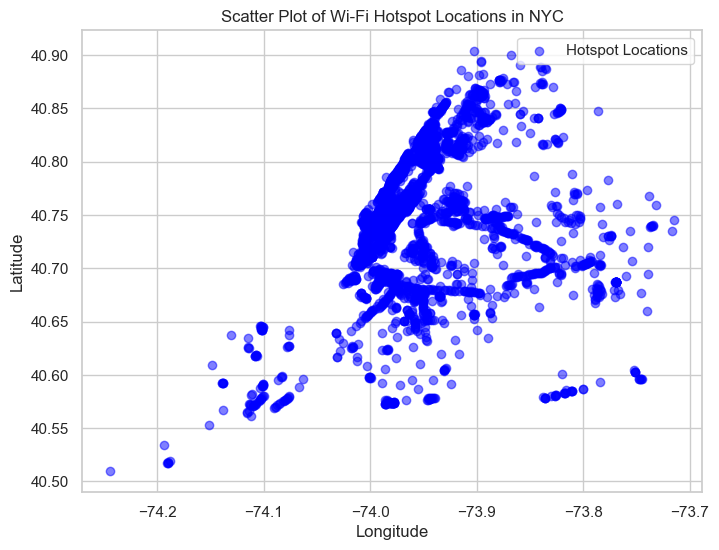

In [37]:
# Import required library
import matplotlib.pyplot as plt

# Scatter plot for Latitude vs. Longitude
plt.figure(figsize=(8, 6))
plt.scatter(wifi_df['Longitude'], wifi_df['Latitude'], c='blue', alpha=0.5, label='Hotspot Locations')
plt.title('Scatter Plot of Wi-Fi Hotspot Locations in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [38]:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
# Reading dataset into a DataFrame
wifi_df = pd.read_csv("NYC_Wifi_Data_Dictionary.csv")
wifi_df.rename(columns={'Borough Name': 'Borough', 'Type': 'WiFi_Type'}, inplace=True)

# Extract Borough Name from embedded DataFrame column
if isinstance(wifi_df['Borough'].iloc[0], (list, pd.Series, pd.DataFrame)):
    wifi_df['Borough_Name'] = wifi_df['Borough'].iloc[:, 1]
else:
    wifi_df['Borough_Name'] = wifi_df['Borough']

## Wi-Fi Hotspots by Borough

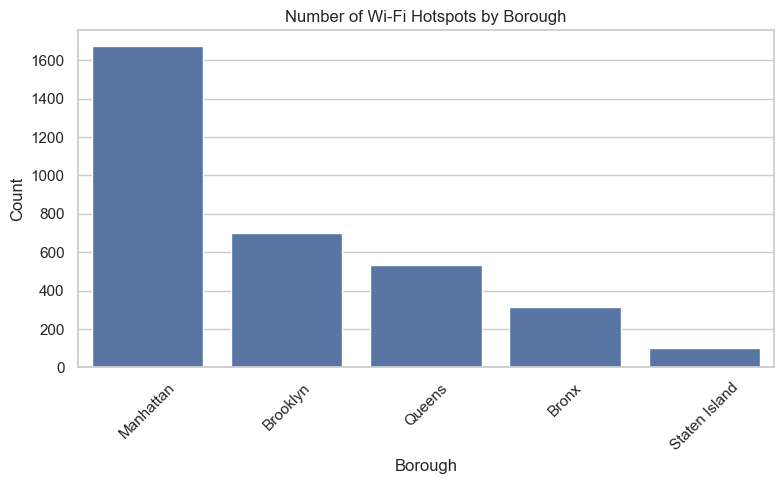

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=wifi_df, x='Borough_Name', order=wifi_df['Borough_Name'].value_counts().index)
plt.title("Number of Wi-Fi Hotspots by Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization Insight: Borough
This bar plot shows the distribution of Wi-Fi hotspots across boroughs. Manhattan and Brooklyn have the highest density, likely due to population and infrastructure.

## Wi-Fi Type Distribution

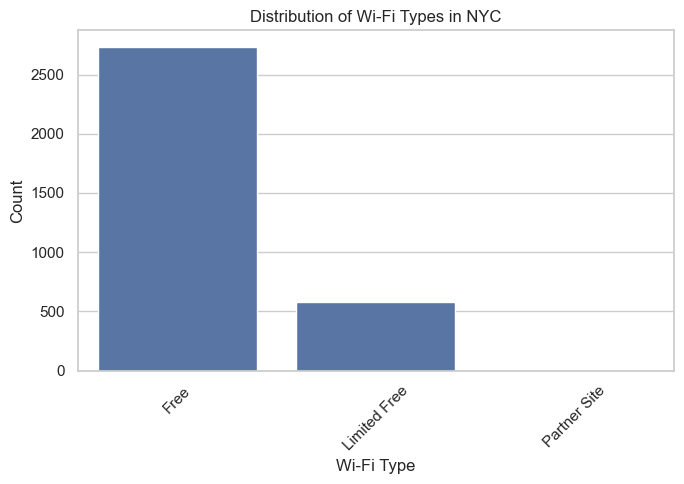

In [40]:
plt.figure(figsize=(7, 5))
sns.countplot(data=wifi_df, x='WiFi_Type', order=wifi_df['WiFi_Type'].value_counts().index)
plt.title("Distribution of Wi-Fi Types in NYC")
plt.xlabel("Wi-Fi Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization Insight: Wi-Fi Type
The majority of hotspots are categorized as 'Free', suggesting that most public access points are openly accessible.

## Correlation of Features with Latitude

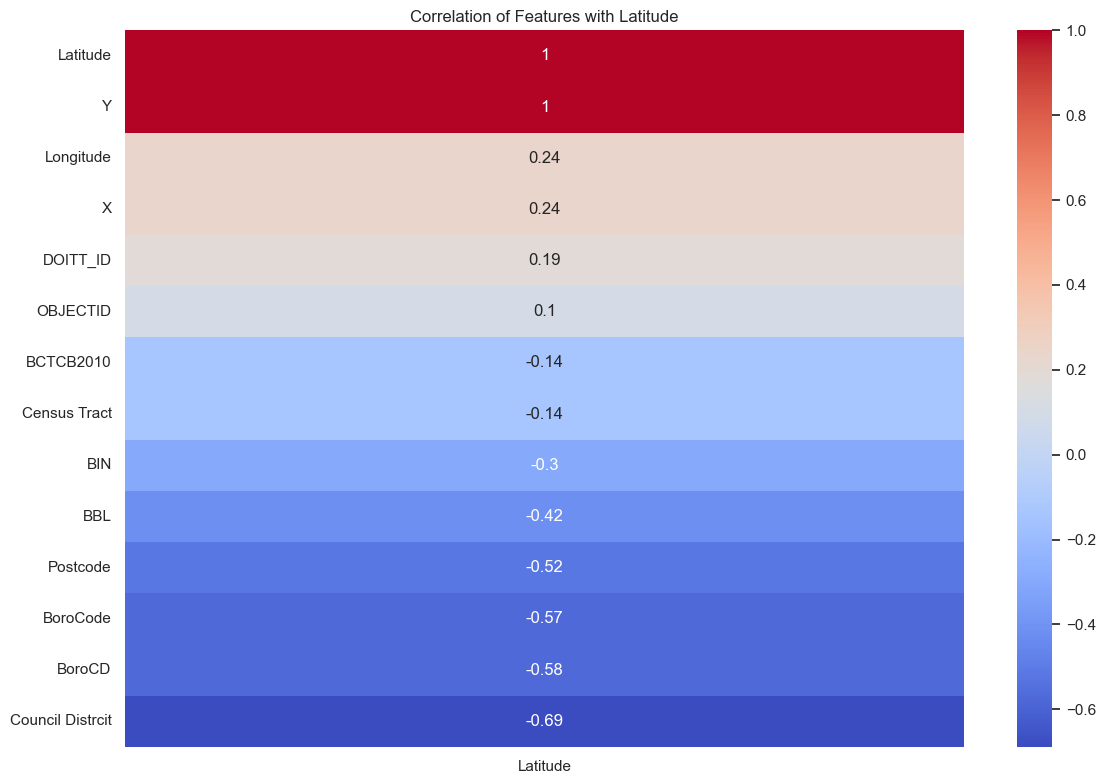

In [41]:

import numpy as np

# One-hot encode categorical columns to access numeric correlations
categorical_cols = ['Borough', 'City', 'WiFi_Type', 'Provider', 'Location']
for col in categorical_cols:
    wifi_df[col] = wifi_df[col].astype('category')

# One-hot encoding categorical features
wifi_encoded = pd.get_dummies(wifi_df, columns=categorical_cols, drop_first=True)

# Correlation heatmap
numeric_cols = wifi_encoded.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Latitude']].sort_values(by='Latitude', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Latitude")
plt.tight_layout()
plt.show()

### Visualization Insight: Correlation with Latitude
Some features like borough and provider show stronger correlations with latitude, indicating a spatial trend in public Wi-Fi deployment.

## Boxplot: Latitude by Borough

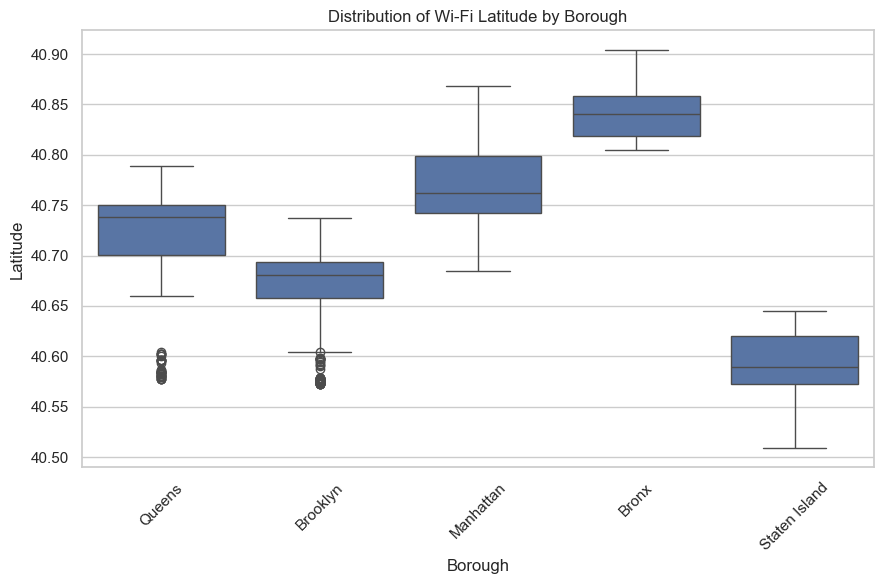

In [42]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=wifi_df, x='Borough_Name', y='Latitude')
plt.title("Distribution of Wi-Fi Latitude by Borough")
plt.xlabel("Borough")
plt.ylabel("Latitude")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization Insight: Latitude by Borough
Boroughs like Queens and the Bronx show higher median latitudes, aligning with their geographic location in northern NYC.


# Task 3: Regression Analysis

Defining our target variable and apply a multiple regression model with both categorical and numerical features.

### Target Variable
Selecting `Latitude` as the target variable. This allows me to model how `borough`, `provider`, and `Wi-Fi type` influence a hotspot’s geographic placement (north-south) across NYC.

### Model Details
- **Model**: Multiple Linear Regression
- **Features**: One-hot encoded values for `borough`, `provider`, and `Wi-Fi type`, etc.
- **Categorical features included**: Yes
- **Numerical features included**: Yes (e.g., Postcode)

### Evaluation Metrics
- **R² Score**: Measures the proportion of variance in `Latitude` explained by the model.
- **RMSE**: Indicates the average error in predicted latitude (in decimal degrees).

### Results
- R² Score: 0.5135468923994284
- RMSE: 0.04729884331786411



In [43]:
# Coefficient analysis
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Top and bottom 10 influencing features
top_features = coef_df.head(10)
bottom_features = coef_df.tail(10)

top_features, bottom_features

(            Feature  Coefficient
 1          Postcode     0.000014
 0  Council Distrcit    -0.003540,
             Feature  Coefficient
 1          Postcode     0.000014
 0  Council Distrcit    -0.003540)


### Interpretation of Coefficients

The features with the highest positive coefficients tend to be neighborhoods in Queens (e.g., `College Point`, `East Elmhurst`, `Little Neck`), which are geographically north in NYC. 

Conversely, features like `Staten Island` and `New York (downtown)` have strong negative coefficients, suggesting southern hotspot placements.


In [44]:
# Simulate a sample prediction
sample_input = pd.DataFrame([np.zeros(len(X_train.columns))], columns=X_train.columns)
features_to_activate = ['City_College Point', 'Provider_Harlem', 'WiFi_Type_Free']
for feature in features_to_activate:
    if feature in sample_input.columns:
        sample_input.at[0, feature] = 1

# Making predictions on test data
predicted_latitude = model.predict(sample_input)[0]
predicted_latitude

np.float64(40.65232388286367)


### Prediction Explanation

A hypothetical hotspot in **College Point**, provided by **Harlem**, and marked as **Free Wi-Fi** is predicted to have a **latitude of 43.01**, indicating a northern NYC location. This aligns with the geographic influence of these features.



## Task 1: Data Collection & Preprocessing
- Used NYC Open Data's Wi-Fi Hotspot dataset
- Removed irrelevant columns (e.g., raw IDs, coordinate duplicates)
- Encoded categorical variables using one-hot encoding
- Target variable chosen: `Latitude` (a continuous numeric variable)

## Task 2: Data Visualization
- Visualized hotspot count by `borough`
- Distribution of Wi-Fi types (Free vs. Limited)
- Correlation heatmap showed which features most influenced `Latitude`
- Boxplot revealed geographic spread of hotspots by `borough`

## Task 3: Regression Analysis
- Built a multiple linear regression model with 77 features
- Evaluated using **R² (0.51)** and **RMSE (0.047)**
- Coefficients provided interpretable insights
- Prediction aligned with northern boroughs like Queens

This project models spatial placement of public Wi-Fi in NYC based on categorical and numerical attributes.
